In [ ]:
from google.colab import drive
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression

In [ ]:
# drive.mount('/content/drive')
train_df=pd.read_csv('/content/drive/My Drive/Participants_Data_TGIH/Train.csv')

In [ ]:
test_df=pd.read_csv('/content/drive/My Drive/Participants_Data_TGIH/Test.csv')

In [ ]:
train_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35


In [ ]:
train_df.isnull().values.any()

False

In [ ]:
train_df.shape

(284780, 8)

In [ ]:
train_df['InvoiceNo'].unique().shape

(20971,)

In [ ]:
train_df['StockCode'].unique().shape

(3619,)

In [ ]:
train_df['Description'].unique().shape

(3819,)

In [ ]:
train_df['CustomerID'].unique().shape

(4339,)

In [ ]:
train_df['Country'].unique().shape

(37,)

In [ ]:
train_df['InvoiceDate']=pd.to_datetime(train_df['InvoiceDate'])
train_df['InvoiceDay']=train_df['InvoiceDate'].dt.day
train_df['InvoiceMonth']=train_df['InvoiceDate'].dt.month
train_df['InvoiceYear']=train_df['InvoiceDate'].dt.year
train_df['InvoiceHour']=train_df['InvoiceDate'].dt.hour

In [ ]:
train_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay,InvoiceMonth,InvoiceYear,InvoiceHour
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35,6,5,2011,16
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35,11,5,2011,7
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35,20,11,2011,13
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35,22,11,2011,12
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35,6,5,2011,9


In [ ]:
train_df['InvoiceYear'].unique()

array([2011, 2010])

In [ ]:
train_df.describe()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,InvoiceDay,InvoiceMonth,InvoiceYear,InvoiceHour
count,284780.000000,284780.000000,284780.000000,284780.000000,284780.000000,284780.000000,284780.000000,284780.000000,284780.000000,284780.000000,284780.000000
mean,9955.394083,1573.386807,2023.955573,12.028468,3.451216,15288.224278,32.823846,15.030318,7.612922,2010.933910,12.738064
std,5551.519138,843.604991,1089.812078,295.111588,78.399541,1714.336529,6.743602,8.652114,3.415785,0.248439,2.288886
min,0.000000,0.000000,0.000000,-80995.000000,0.000000,12346.000000,0.000000,1.000000,1.000000,2010.000000,6.000000
25%,5069.000000,939.000000,1141.000000,2.000000,1.250000,13953.000000,35.000000,7.000000,5.000000,2011.000000,11.000000
50%,10310.000000,1521.000000,1987.000000,5.000000,1.950000,15152.000000,35.000000,15.000000,8.000000,2011.000000,13.000000
75%,14657.000000,2106.000000,2945.000000,12.000000,3.750000,16794.000000,35.000000,22.000000,11.000000,2011.000000,14.000000
max,22188.000000,3683.000000,3895.000000,80995.000000,38970.000000,18287.000000,36.000000,31.000000,12.000000,2011.000000,20.000000


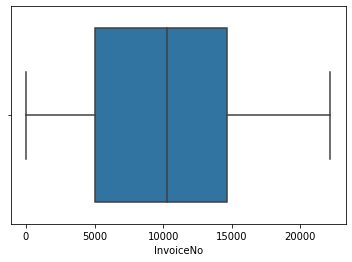

In [ ]:
sns.boxplot(x=train_df['InvoiceNo'])

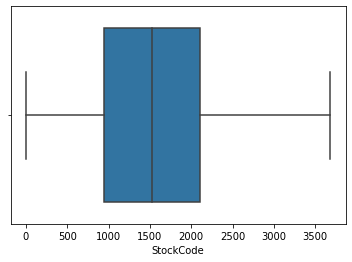

In [ ]:
sns.boxplot(x=train_df['StockCode'])

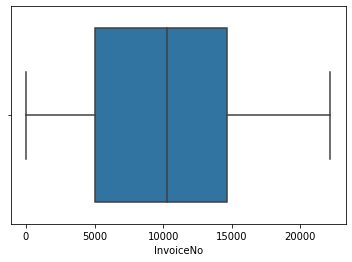

In [ ]:
sns.boxplot(x=train_df['InvoiceNo'])

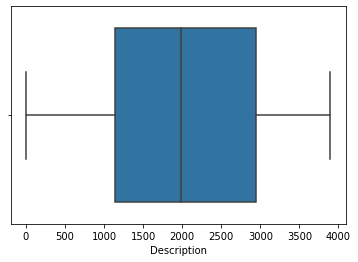

In [ ]:
sns.boxplot(x=train_df['Description'])

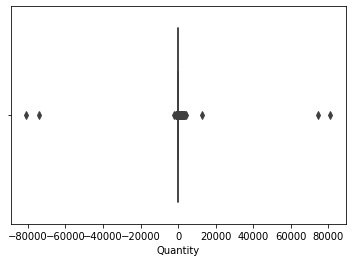

In [ ]:
sns.boxplot(x=train_df['Quantity'])

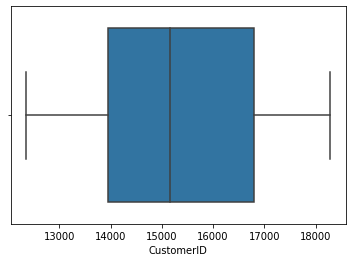

In [ ]:
sns.boxplot(x=train_df['CustomerID'])

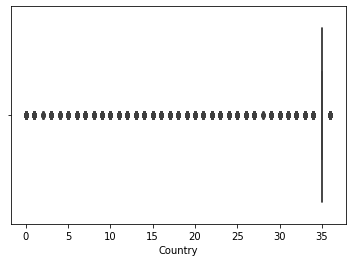

In [ ]:
sns.boxplot(x=train_df['Country'])

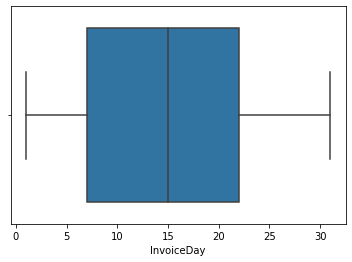

In [ ]:
sns.boxplot(x=train_df['InvoiceDay'])

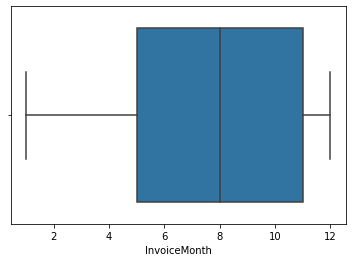

In [ ]:
sns.boxplot(x=train_df['InvoiceMonth'])

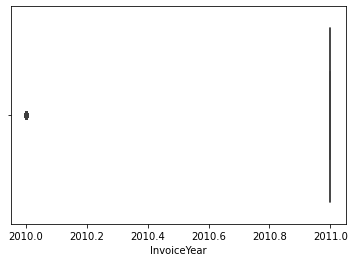

In [ ]:
sns.boxplot(x=train_df['InvoiceYear'])

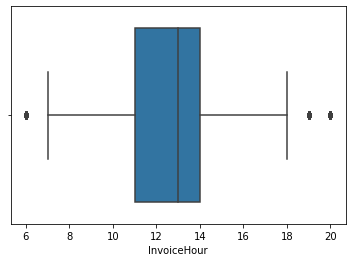

In [ ]:
sns.boxplot(x=train_df['InvoiceHour'])

In [ ]:
train_df[train_df['InvoiceYear']==2010]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay,InvoiceMonth,InvoiceYear,InvoiceHour
19,262,787,2601,24,2010-12-03 09:51:00,0.42,12686.0,13,3,12,2010,9
21,888,439,3369,8,2010-12-12 16:05:00,1.25,17618.0,35,12,12,2010,16
33,472,1607,3285,12,2010-12-06 14:19:00,0.85,16817.0,35,6,12,2010,14
37,401,3156,1161,5,2010-12-05 16:41:00,0.85,12748.0,35,5,12,2010,16
48,832,2844,2880,4,2010-12-10 13:48:00,2.55,16727.0,35,10,12,2010,13
...,...,...,...,...,...,...,...,...,...,...,...,...
284723,385,285,67,2,2010-12-05 15:12:00,1.25,15889.0,35,5,12,2010,15
284733,863,1176,1610,4,2010-12-12 12:00:00,1.25,17372.0,35,12,12,2010,12
284741,375,1369,2009,4,2010-12-05 14:02:00,4.95,12647.0,14,5,12,2010,14
284758,1088,1014,2934,3,2010-12-15 14:45:00,4.95,15641.0,35,15,12,2010,14


In [ ]:
train_df[train_df['InvoiceHour']<=8]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay,InvoiceMonth,InvoiceYear,InvoiceHour
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35,11,5,2011,7
11,4993,1236,1802,4,2011-04-08 08:20:00,4.25,13015.0,35,8,4,2011,8
53,15741,1084,865,4,2011-11-09 08:36:00,3.95,13046.0,35,9,11,2011,8
85,16163,1838,3063,8,2011-11-14 08:41:00,1.48,17450.0,35,14,11,2011,8
86,13344,1050,2578,24,2011-10-05 08:17:00,0.42,17728.0,35,5,10,2011,8
...,...,...,...,...,...,...,...,...,...,...,...,...
284455,7097,1325,2145,6,2011-05-24 08:49:00,2.95,13523.0,35,24,5,2011,8
284465,13679,2314,2588,12,2011-10-10 08:58:00,1.25,17509.0,35,10,10,2011,8
284489,16489,986,2326,6,2011-11-17 08:35:00,2.95,12681.0,13,17,11,2011,8
284620,7890,1261,1769,10,2011-06-10 08:54:00,2.08,17115.0,35,10,6,2011,8


In [ ]:
train_df[train_df['InvoiceHour']>=18]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay,InvoiceMonth,InvoiceYear,InvoiceHour
6,18494,165,3377,1,2011-12-08 20:01:00,1.25,12748.0,35,8,12,2011,20
32,6148,562,3357,1,2011-05-06 19:48:00,2.55,12748.0,35,6,5,2011,19
45,8796,2143,3298,3,2011-06-30 18:17:00,1.65,17921.0,35,30,6,2011,18
65,8543,1805,1738,1,2011-06-23 19:46:00,4.25,15453.0,35,23,6,2011,19
163,14873,2091,3029,1,2011-10-27 20:07:00,1.25,15014.0,35,27,10,2011,20
...,...,...,...,...,...,...,...,...,...,...,...,...
284437,5342,1891,2687,2,2011-04-14 18:22:00,8.25,17142.0,35,14,4,2011,18
284494,774,1092,3283,2,2010-12-09 19:32:00,0.85,13969.0,35,9,12,2010,19
284504,6496,2937,452,24,2011-05-12 18:13:00,0.85,17671.0,35,12,5,2011,18
284650,21519,2294,1563,-1,2011-10-20 19:15:00,1.25,17169.0,35,20,10,2011,19


In [ ]:
train_df[train_df['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay,InvoiceMonth,InvoiceYear,InvoiceHour
20,20652,3131,1576,-36,2011-07-26 10:15:00,1.06,12431.0,0,26,7,2011,10
152,22083,2224,11,-1,2011-12-01 10:41:00,4.95,15993.0,35,1,12,2011,10
157,19796,1521,2679,-6,2011-04-26 11:19:00,2.95,12705.0,14,26,4,2011,11
186,21750,2166,1760,-100,2011-11-09 11:41:00,1.79,17511.0,35,9,11,2011,11
196,21369,1014,2934,-17,2011-10-06 20:08:00,4.25,16839.0,35,6,10,2011,20
...,...,...,...,...,...,...,...,...,...,...,...,...
284550,21879,2145,3746,-1,2011-11-18 09:44:00,2.10,17034.0,35,18,11,2011,9
284650,21519,2294,1563,-1,2011-10-20 19:15:00,1.25,17169.0,35,20,10,2011,19
284727,22148,2334,3664,-6,2011-12-06 14:57:00,3.75,15622.0,35,6,12,2011,14
284740,20867,2658,826,-1,2011-08-22 15:00:00,3.25,16184.0,35,22,8,2011,15


In [ ]:
train_df[train_df['Quantity']>35]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay,InvoiceMonth,InvoiceYear,InvoiceHour
35,5943,2731,2804,100,2011-05-04 11:00:00,0.18,14298.0,35,4,5,2011,11
43,2008,1416,2585,96,2011-01-21 11:18:00,1.45,14646.0,23,21,1,2011,11
47,2262,821,972,36,2011-01-27 16:29:00,0.21,13280.0,35,27,1,2011,16
60,11873,291,22,192,2011-09-09 12:09:00,0.29,14414.0,35,9,9,2011,12
64,14371,1415,2581,96,2011-10-20 12:03:00,1.45,14646.0,23,20,10,2011,12
...,...,...,...,...,...,...,...,...,...,...,...,...
284718,1815,1127,90,288,2011-01-14 12:24:00,1.45,14646.0,23,14,1,2011,12
284730,5036,2572,3149,48,2011-04-08 12:42:00,0.39,13562.0,35,8,4,2011,12
284737,9671,996,2119,36,2011-07-21 13:06:00,0.39,16607.0,35,21,7,2011,13
284759,9792,3137,3103,60,2011-07-24 14:12:00,1.45,12763.0,19,24,7,2011,14


In [ ]:
train_df.drop('InvoiceDate', inplace=True, axis=1)

In [ ]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(train_df))
print(z)

[[0.68709135 0.01139539 1.72503032 ... 0.76495649 0.26601982 1.42512165]
 [0.64962406 0.32407026 1.52140665 ... 0.76495649 0.26601982 2.50692873]
 [1.22986479 0.71670303 0.07795447 ... 0.99159747 0.26601982 0.11443819]
 ...
 [0.59702575 1.07442275 1.4755271  ... 0.76495649 0.26601982 0.3224563 ]
 [0.69613607 0.00309766 0.97727518 ... 0.69883848 0.26601982 0.55133267]
 [0.19573162 1.2204942  0.79642822 ... 0.11332049 0.26601982 0.11443819]]


In [ ]:
z.shape

(284780, 11)

In [ ]:
threshold = 3
print(np.where(z > 3))

(array([     6,     19,     20, ..., 284758, 284760, 284768]), array([10,  9,  6, ...,  9,  9,  6]))


In [ ]:
train_df_o = train_df[(z < 3).all(axis=1)]

In [ ]:
train_df_o

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,InvoiceDay,InvoiceMonth,InvoiceYear,InvoiceHour
0,6141,1583,144,3,3.75,14056.0,35,6,5,2011,16
1,6349,1300,3682,6,1.95,13098.0,35,11,5,2011,7
2,16783,2178,1939,4,5.95,15044.0,35,20,11,2011,13
3,16971,2115,2983,1,0.83,15525.0,35,22,11,2011,12
4,6080,1210,2886,12,1.65,13952.0,35,6,5,2011,9
...,...,...,...,...,...,...,...,...,...,...,...
284775,3408,1706,1081,6,1.65,17965.0,35,1,3,2011,12
284776,13982,2184,2947,16,0.65,16793.0,35,13,10,2011,15
284777,6641,667,3632,4,8.50,14755.0,35,16,5,2011,12
284778,13820,1576,3089,48,3.45,14866.0,35,11,10,2011,14


In [ ]:
target = train_df_o['UnitPrice']
train_df_o.drop('UnitPrice', inplace=True, axis=1)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
reg = LinearRegression().fit(train_df_o, target)

In [ ]:
test_df['InvoiceDate']=pd.to_datetime(test_df['InvoiceDate'])
test_df['InvoiceDay']=test_df['InvoiceDate'].dt.day
test_df['InvoiceMonth']=test_df['InvoiceDate'].dt.month
test_df['InvoiceYear']=test_df['InvoiceDate'].dt.year
test_df['InvoiceHour']=test_df['InvoiceDate'].dt.hour
test_df.drop('InvoiceDate', inplace=True, axis=1)

In [ ]:
out = reg.predict(test_df)

In [ ]:
test_df.head()

,InvoiceNo,StockCode,Description,Quantity,CustomerID,Country,InvoiceDay,InvoiceMonth,InvoiceYear,InvoiceHour
0,3139,1709,1079,3,16161.0,35,22,2,2011,15
1,617,510,3457,1,17341.0,35,8,12,2010,12
2,14653,604,694,36,15158.0,35,25,10,2011,13
3,8634,1478,3473,2,16033.0,35,27,6,2011,12
4,15546,3216,871,1,15351.0,35,6,11,2011,16


In [ ]:
out

array([ 3.30560572, -0.30062437,  1.90166035, ...,  0.10693479,
        3.06627798,  3.02672616])

In [ ]:
sample_df=pd.read_csv('/content/drive/My Drive/Participants_Data_TGIH/Sample Submission.csv')

In [ ]:
sample_df['UnitPrice'] = out

In [ ]:
sample_df

,UnitPrice
0,3.305606
1,-0.300624
2,1.901660
3,2.904644
4,3.584614
...,...
122044,3.402382
122045,3.458354
122046,0.106935
122047,3.066278


In [ ]:
sample_df.to_csv('my_submission_file1.csv', index=False)